In [6]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# File name
filename = "output_training.txt"

# Containers
episodes = []
rewards = []
avg_rewards = []
best_rewards = []
best_avg_rewards = []
steps = []
epsilons = []

In [8]:
# Regex pattern to parse each line
pattern = re.compile(
    r"Episode\s+(\d+)\s+\| Reward:\s+([-\d.]+)\s+\| Avg\(100\):\s+([-\d.]+)\s+\| "
    r"Epsilon:\s+([-\d.]+)\s+\| Best Avg Reward:\s+([-\d.inf]+)\s+\| "
    r"Best Reward:\s+([-\d.]+)\s+\| Steps:\s+(\d+)"
)

In [9]:
# Read and parse file
with open(filename, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            episodes.append(int(match.group(1)))
            rewards.append(float(match.group(2)))
            avg_rewards.append(float(match.group(3)))
            epsilons.append(float(match.group(4)))

            best_avg = match.group(5)
            best_avg_rewards.append(float(best_avg) if best_avg != "-inf" else float("nan"))

            best_rewards.append(float(match.group(6)))
            steps.append(int(match.group(7)))

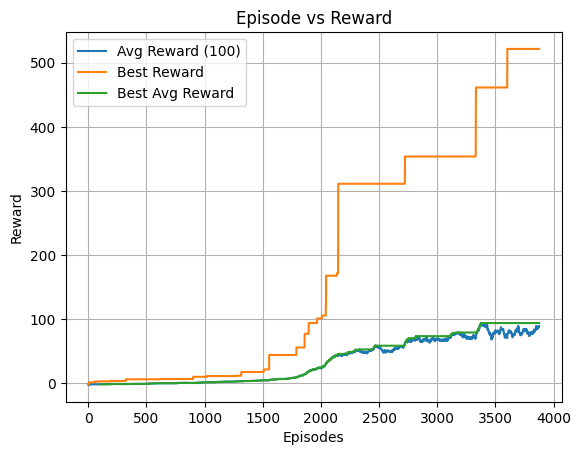

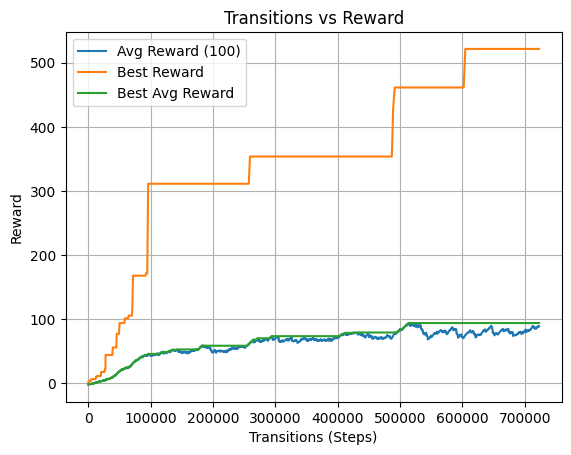

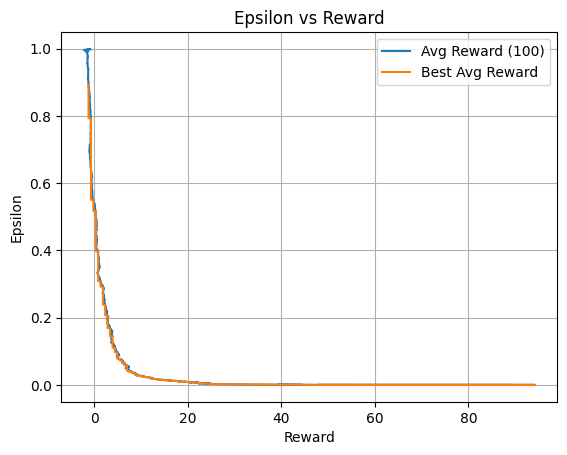

In [10]:
# ---------- Plot 1: Episode vs Reward ----------
plt.figure()
plt.plot(episodes, avg_rewards, label="Avg Reward (100)")
plt.plot(episodes, best_rewards, label="Best Reward")
plt.plot(episodes, best_avg_rewards, label="Best Avg Reward")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Episode vs Reward")
plt.legend()
plt.grid(True)

# ---------- Plot 2: Transitions (Steps) vs Reward ----------
plt.figure()
plt.plot(steps, avg_rewards, label="Avg Reward (100)")
plt.plot(steps, best_rewards, label="Best Reward")
plt.plot(steps, best_avg_rewards, label="Best Avg Reward")
plt.xlabel("Transitions (Steps)")
plt.ylabel("Reward")
plt.title("Transitions vs Reward")
plt.legend()
plt.grid(True)

# ---------- Plot 3: Epsilon vs Reward ----------
plt.figure()
plt.plot(avg_rewards, epsilons, label="Avg Reward (100)")
plt.plot(best_avg_rewards, epsilons, label="Best Avg Reward")
plt.xlabel("Reward")
plt.ylabel("Epsilon")
plt.title("Epsilon vs Reward")
plt.legend()
plt.grid(True)

# Show all plots
plt.show()